In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.plot_keypoints import show_keypoints
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [87]:
comp_data = pd.read_csv('data/complete_body.csv')
incomp_data = pd.read_csv('data/incomplete_body.csv')

In [88]:
#incomp_data.isna().sum()

In [89]:
concatenated_df = pd.concat([comp_data, incomp_data], ignore_index=True)

In [90]:
regressor = LinearRegression()
imputer = IterativeImputer(estimator=regressor, max_iter=20, random_state=0)
imputed_values = imputer.fit_transform(concatenated_df)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [91]:
#imputed_keypoints = imputer.transform(targets)
imputed_df = pd.DataFrame(imputed_values, columns=concatenated_df.columns)
imputed_df

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,670.79,278.54,672.53,276.80,669.33,276.84,675.250000,277.910000,667.14,277.75,...,663.08,311.66,671.870000,333.780000,661.95,333.37,669.330000,353.900000,658.410000,353.790000
1,670.59,278.36,672.35,276.72,669.16,276.74,675.200000,277.910000,667.10,277.68,...,663.10,311.44,671.510000,333.730000,661.97,333.11,669.150000,353.840000,658.440000,353.460000
2,670.50,278.39,672.29,276.75,669.06,276.78,675.090000,277.890000,666.95,277.59,...,663.07,311.42,671.510000,333.850000,661.94,333.21,669.080000,353.980000,658.330000,353.180000
3,670.49,278.43,672.24,276.77,668.98,276.81,675.090000,277.920000,666.81,277.74,...,663.03,311.28,671.260000,333.480000,661.58,331.99,668.910000,353.410000,658.260000,352.930000
4,670.54,278.39,672.16,276.70,668.93,276.77,674.870000,277.800000,666.57,277.89,...,662.88,311.34,671.120000,333.490000,661.34,331.94,669.100000,353.390000,658.040000,352.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140871,264.26,251.87,265.97,249.19,261.93,249.54,269.770000,249.170000,258.29,249.65,...,260.60,299.52,277.425434,329.148878,261.55,330.24,279.254800,356.062066,262.182302,356.689498
140872,332.91,238.93,334.42,236.78,330.78,236.94,335.605364,237.774057,326.42,237.79,...,326.29,282.01,336.050000,307.750000,325.88,308.91,333.070000,327.300000,323.970000,329.980000
140873,334.58,239.43,335.88,237.21,332.27,237.36,336.892987,238.070663,328.03,238.13,...,327.28,283.02,336.120000,309.790000,326.18,309.83,332.720000,329.950000,323.830000,332.950000
140874,334.87,240.07,336.13,237.77,332.61,238.09,338.740000,237.740000,328.64,238.66,...,328.48,286.38,338.210000,308.990000,327.91,311.20,341.447527,331.956340,326.250000,332.110000


In [92]:
normalized_df = (concatenated_df - concatenated_df.min()) / (concatenated_df.max() - concatenated_df.min())

In [93]:
df_interpolated = concatenated_df.interpolate(method='linear')

In [94]:
imputed_df.min()

nose_x              14.710000
nose_y               5.730000
left_eye_x          22.300000
left_eye_y          -1.229434
right_eye_x          6.710000
right_eye_y         -1.805652
left_ear_x          22.397498
left_ear_y          -3.052794
right_ear_x         -4.593999
right_ear_y         -7.989247
left_shoulder_x     22.210000
left_shoulder_y     11.660000
right_shoulder_x    -7.115386
right_shoulder_y    11.850000
left_elbow_x        35.690000
left_elbow_y        -4.623755
right_elbow_x       -1.257026
right_elbow_y       41.540000
left_wrist_x        26.020000
left_wrist_y       -79.033671
right_wrist_x      -12.026069
right_wrist_y        5.890000
left_hip_x          29.190000
left_hip_y          36.740000
right_hip_x         11.320000
right_hip_y         46.900000
left_knee_x         17.450000
left_knee_y         64.570000
right_knee_x         0.050000
right_knee_y        60.183881
left_ankle_x       -23.574631
left_ankle_y        88.190000
right_ankle_x      -28.437328
right_ankl

In [115]:
#imputed_df.to_csv('data/imputed_full_body.csv', index=False)

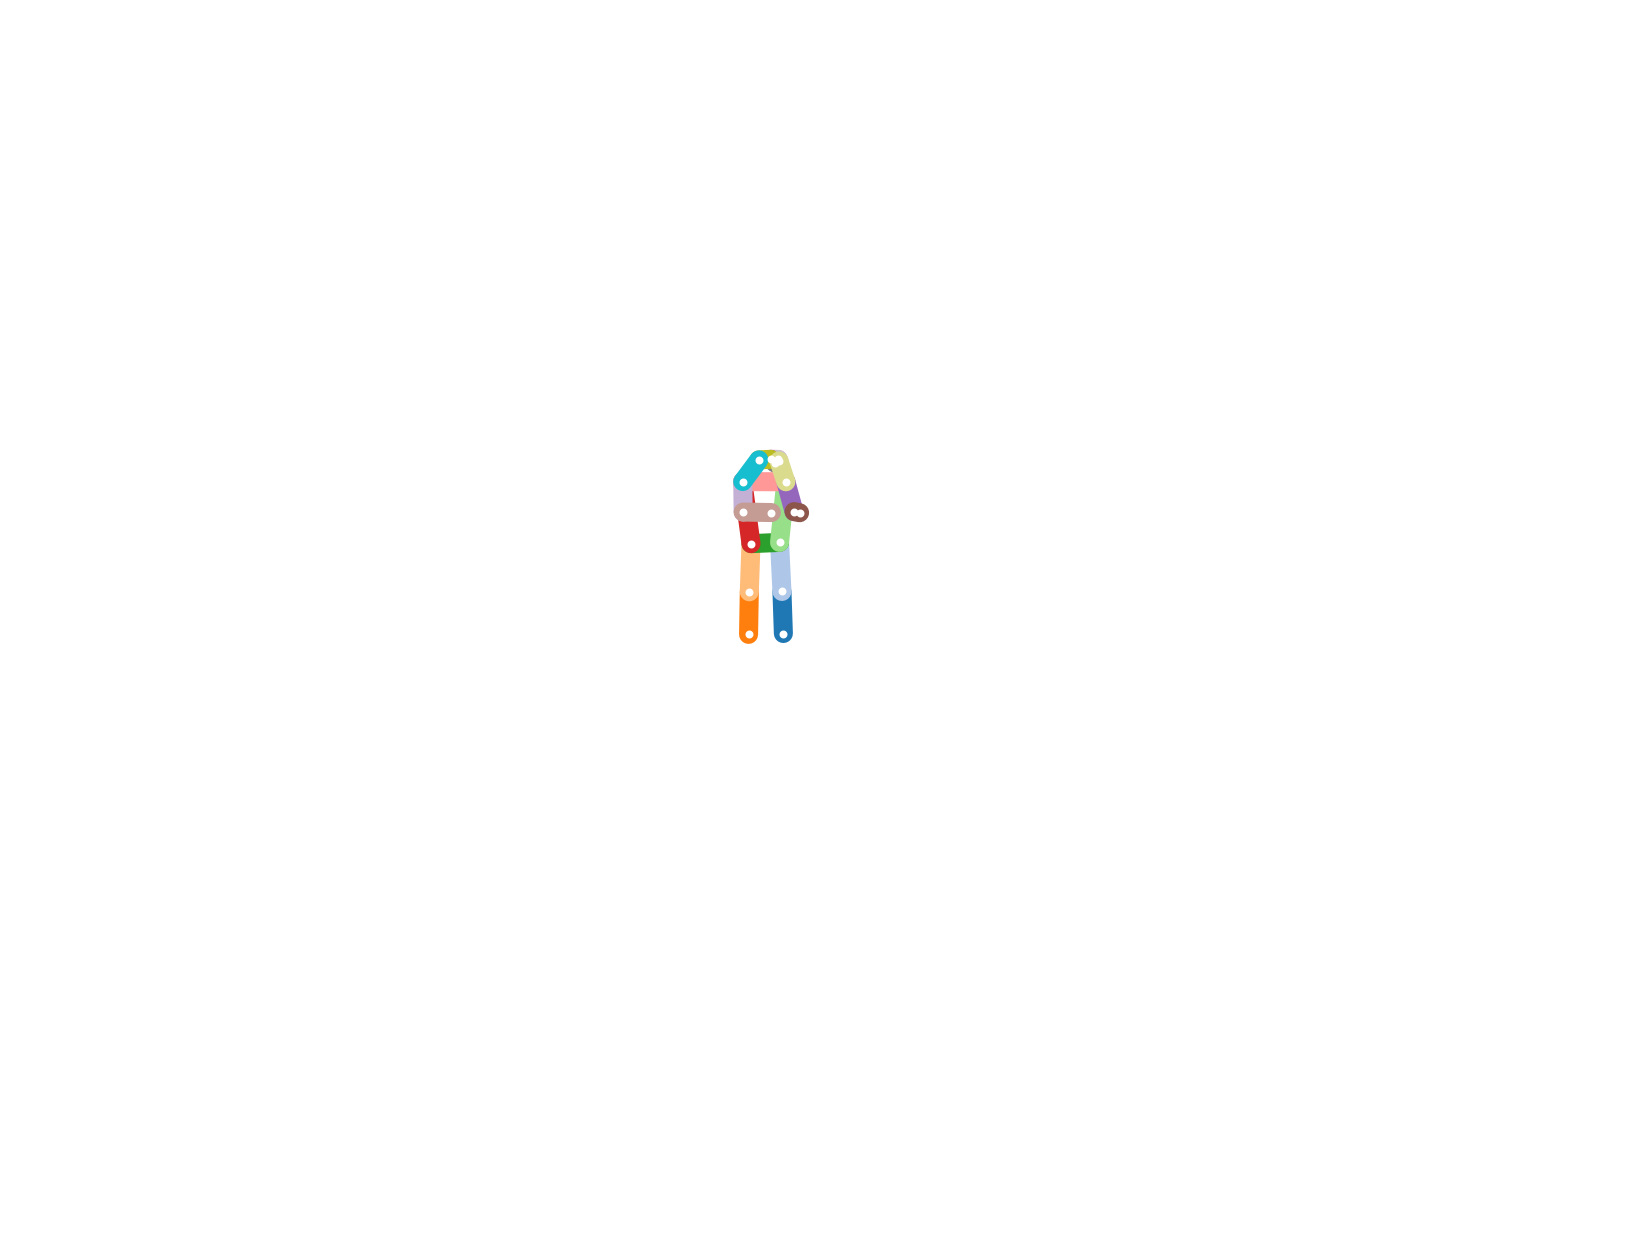

In [114]:
row = imputed_df.sample(1).values.reshape(17,2)
show_keypoints(row)

In [104]:
#imputed_keypoints = imputer.transform(targets)
imputed_df = pd.DataFrame(imputed_keypoints, columns=features.columns)
imputed_df

NameError: name 'imputed_keypoints' is not defined